In [1]:
# import wewenątrznej bazy danych
import sqlite3

In [2]:
# import standardowych bibliotek
import pandas as pd
import numpy as np
import os

In [3]:
# import bibliotek służących do wizualizacji
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

In [6]:
# sprawdza aktualną ścieżkę
pwd

NameError: name 'pwd' is not defined

In [5]:
# połączenie z bazą i wykorzystanie kursora
dbConnection = sqlite3.connect("bookdb");
dbCursor = dbConnection.cursor()

In [7]:
# rozszerzenie plików zawierających dane do wczytania
txtExtention = ".txt"

In [8]:
# tablica z nazwami plików do oczytu, zawierające dane, które będą importowane do tabel bazodanowych
tables = ["Customers", "Orderlines", "Products", "Campaigns", "Orders"]

In [9]:
# wczytywanie kolejnych plików w pętli for
for table in tables:
    # ustawienie sciezki (nazwy plikow pisane malymy literami)
    path = os.path.expanduser(table.lower() + txtExtention)
    # wczytywanie pliku używając delimitera tabulacji oraz kodowania 'latin1'
    file = pd.read_csv(path, delimiter="\t", encoding = 'latin1')
    # tworzy na podstawie pliku tabele i wypełnia ją rekordami, jesli instnieje zostaje nadpisana
    file.to_sql(table, dbConnection, if_exists="replace");

In [10]:
# pobranie informacji do DataFrame
selectGenderQuery = '''SELECT o.orderdate, c.gender, c.firstname from Orders o join Customers c on o.customerid = c.customerid '''
genderDF = pd.read_sql_query(selectGenderQuery, dbConnection)

In [11]:
# sprawdzanie czy rekordy się wczytały
genderDF.head()

orderdate gender firstname
0  2009-10-13 00:00:00      M     LOUIS
1  2009-10-13 00:00:00      M   ANTHONY
2  2011-06-02 00:00:00   None   MERRILL
3  2009-10-14 00:00:00      F     MARIA
4  2010-11-19 00:00:00   None        T.

In [12]:
# usunięcie niepotrzebnych wartosci z daty do roku i konwersja typu na typ całkowity
genderDF["orderdate"] = genderDF["orderdate"].str[:-15].astype(np.int64)

In [13]:
# ustawienie wyników na daty większe niż 2015 rok 
genderDF = genderDF[genderDF["orderdate"] >= 2015]

In [14]:
# zmiana nazwy kolumny
genderDF.rename(columns={'orderdate': 'year'}, inplace=True)
# reindeksacja według kolumny 'year'
genderDF = genderDF.set_index("year")
# usunięcie pustych krotek
genderDF = genderDF.dropna()
# posortowanie rekordów po indexie
genderDF.sort_index()

gender firstname
year                 
2015      M      PAUL
2015      M    STEVEN
2015      M    EDWARD
2015      M     ALLEN
2015      M   GREGORY
2015      F     LINDA
2015      F     WILMA
2015      F   SUZANNE
2015      M   RICHARD
2015      M   STEPHEN
2015      F    SHEILA
2015      F   CHARLES
2015      F    NOELLA
2015      F     LYNNE
2015      M    MURRAY
2015      M    ROBERT
2015      F     ALICE
2015      F  MARGARET
2015      M    MARTIN
2015      M     JAMES
2015      F   LILLIAN
2015      M    ROBERT
2015      F  JEANETTE
2015      F     GAYLE
2015      M     KEITH
2015      F   BARBARA
2015      F    SANDRA
2015      M   CHARLES
2015      F     DIANE
2015      M       KEN
...     ...       ...
2016      M    HOWARD
2016      M      BILL
2016      F     AJAYA
2016      M      TONY
2016      M      MARC
2016      F       ANN
2016      M      LUIZ
2016      M    DANIEL
2016      M      TONY
2016      F    DEBORA
2016      F     CAROL
2016      M      MATT
2016      F   BARBARA
2016      F    ALICIA
2016      F     LINDA
2016      M    MARVIN
2016      F      JANE
2016      M      FRED
2016      F    BONNIE
2016      F    PAMELA
2016      M   KENNETH
2016      F     BETTY
2016      F     WENDY
2016      F    ANDREA
2016      M     JAMES
2016      F    DENYSE
2016      M   DOMINIC
2016      M        J.
2016      M   NOBUAKI
2016      F     JULIA

[41427 rows x 2 columns]

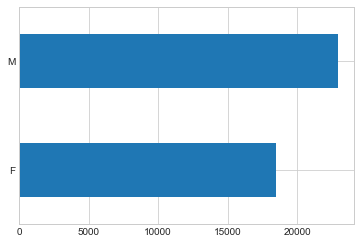

In [15]:
# policzenie liczby kobiet i mężczyzn w DataFrame
genderCounts = pd.value_counts(genderDF['gender'].values, sort=False)
# rysowanie wykresu
genderCounts[:].plot(kind='barh', rot=0)

In [17]:
# wczytanie informacji o grupach produktów
selectProductGroupsQuery = '''select p.PRODUCTGROUPNAME, p.INSTOCKFLAG, ol.unitprice from Products p 
                              join Orderlines ol on p.productid = ol.productid'''
groupsDF = pd.read_sql_query(selectProductGroupsQuery, dbConnection)
groupsDF = groupsDF.dropna()
# eliminacja rekordów które w kolumnie 'PRODUCTGROUPNAME' są ustawione na 'FREEBIE'
groupsDF = groupsDF[groupsDF["PRODUCTGROUPNAME"] != "FREEBIE"]
# czy jest w magazynie
groupsDF = groupsDF[groupsDF["INSTOCKFLAG"] == 'Y']  
# czy eliminacja wartości  jednostkowej równej zero
groupsDF = groupsDF[groupsDF["unitprice"] > 0]       
# sortowanie
groupsDF.sort_values("unitprice", ascending=False)

PRODUCTGROUPNAME INSTOCKFLAG  unitprice
160805          ARTWORK           Y    6250.00
160804          ARTWORK           Y    6250.00
160803          ARTWORK           Y    5967.37
160763          ARTWORK           Y    3165.00
160764          ARTWORK           Y    3165.00
160811          ARTWORK           Y    3145.00
160762          ARTWORK           Y    3127.00
160769          ARTWORK           Y    3000.00
160756          ARTWORK           Y    3000.00
160755          ARTWORK           Y    3000.00
160754          ARTWORK           Y    3000.00
160760          ARTWORK           Y    2848.50
160761          ARTWORK           Y    2848.50
160842          ARTWORK           Y    2848.50
267761          ARTWORK           Y    2750.00
263101          ARTWORK           Y    2750.00
160753          ARTWORK           Y    2700.00
160750          ARTWORK           Y    2665.00
160744          ARTWORK           Y    2665.00
160734          ARTWORK           Y    2665.00
160745          ARTWORK           Y    2665.00
160751          ARTWORK           Y    2665.00
160743          ARTWORK           Y    2665.00
160810          ARTWORK           Y    2645.00
160808          ARTWORK           Y    2645.00
160809          ARTWORK           Y    2645.00
160782          ARTWORK           Y    2638.00
160746          ARTWORK           Y    2500.00
160742          ARTWORK           Y    2500.00
17884           ARTWORK           Y    2500.00
...                 ...         ...        ...
285375         OCCASION           Y       2.25
285376         OCCASION           Y       2.25
285377         OCCASION           Y       2.25
285378         OCCASION           Y       2.25
285371         OCCASION           Y       2.25
174863             GAME           Y       2.15
173807             GAME           Y       2.05
262384             BOOK           Y       1.96
215364             GAME           Y       1.95
171782             GAME           Y       1.95
216287             GAME           Y       1.87
265579         CALENDAR           Y       1.82
285369         OCCASION           Y       1.75
285370         OCCASION           Y       1.75
164099             BOOK           Y       1.62
215363             GAME           Y       1.60
215362             GAME           Y       1.60
721                BOOK           Y       1.50
254958             GAME           Y       1.47
139334             BOOK           Y       1.44
266759          APPAREL           Y       1.40
271655             GAME           Y       1.30
179148             BOOK           Y       1.30
173806             GAME           Y       0.95
271699             GAME           Y       0.92
35516              GAME           Y       0.66
93138          OCCASION           Y       0.64
183281             GAME           Y       0.54
168517             BOOK           Y       0.20
94750          OCCASION           Y       0.08

[152098 rows x 3 columns]

In [26]:
# policzenie średniej dla typoów produktów
groupsDF = groupsDF.groupby(["PRODUCTGROUPNAME"]).mean()

unitprice
PRODUCTGROUPNAME            
APPAREL            26.508976
ARTWORK           198.450770
BOOK               22.146146
CALENDAR           23.780366
GAME               21.425332
OCCASION           22.716397
OTHER              41.458258

array([<matplotlib.axes._subplots.AxesSubplot object at 0x000001E35FF5D1D0>], dtype=object)

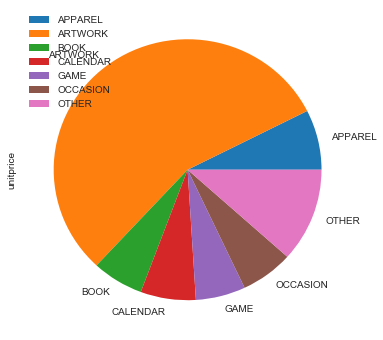

In [25]:
# rysowanie wykresu
groupsDF.plot(kind='pie', legend=True, subplots=True, figsize=(6, 6))

In [28]:
# wczytywanie informacji o produktrach powiązanych z zamówieniami i linią zamówieniową
productQuery = '''
SELECT ol.billdate, ol.totalprice, o.city, p.PRODUCTGROUPNAME
FROM Orders o JOIN Orderlines ol ON o.orderid = ol.orderid 
JOIN Products p ON ol.productid = p.PRODUCTID
'''

In [29]:
gamesDF = pd.read_sql_query(productQuery, dbConnection)
gamesDF.head()

billdate  totalprice          city PRODUCTGROUPNAME
0  2009-11-12 00:00:00      175.00        NEWTON          ARTWORK
1  2009-11-26 00:00:00       10.00        NEWTON          ARTWORK
2  2009-10-23 00:00:00        5.00        NEWTON         OCCASION
3  2009-11-04 00:00:00       10.00  NEW ROCHELLE          ARTWORK
4  2011-06-06 00:00:00       17.61         MIAMI         OCCASION

In [30]:
# konwersja daty na rok (jako liczba całkowita)
gamesDF["year"] = gamesDF["billdate"].str[:-15].astype(np.int64)
gamesDF["billdate"] = gamesDF["billdate"].str[:-9]
# usunięcie zer z daty i zapisanie ją jako typ datowy
gamesDF["billdate"] = pd.to_datetime(gamesDF["billdate"])
# sprawdzenie typu dla pewności czy konwersja zaszła poprawnie
gamesDF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 286017 entries, 0 to 286016
Data columns (total 5 columns):
billdate            286017 non-null datetime64[ns]
totalprice          286017 non-null float64
city                285983 non-null object
PRODUCTGROUPNAME    286008 non-null object
year                286017 non-null int64
dtypes: datetime64[ns](1), float64(1), int64(1), object(2)
memory usage: 10.9+ MB


In [31]:
# filtrowanie danych, wyszukiwanie produktów które są grami, i sprzedały się w 2016 roku w stanie Nowy York
gamesDF = gamesDF[gamesDF["year"] == 2016]
gamesDF = gamesDF[gamesDF["city"] == "NEW YORK"]
gamesDF = gamesDF[gamesDF["PRODUCTGROUPNAME"] == "GAME"]
gamesDF = gamesDF.set_index("billdate")
gamesDF.head()

totalprice      city PRODUCTGROUPNAME  year
billdate                                               
2016-01-05        7.44  NEW YORK             GAME  2016
2016-01-07       13.49  NEW YORK             GAME  2016
2016-01-15       44.95  NEW YORK             GAME  2016
2016-01-25       44.95  NEW YORK             GAME  2016
2016-02-01       44.95  NEW YORK             GAME  2016

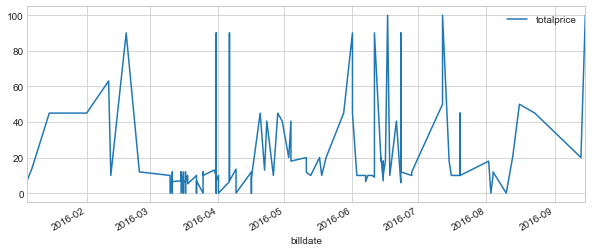

In [34]:
# rysowanie wykresu
gamesDF['totalprice'].plot(legend=True,figsize=(10,4))

In [35]:
# Tablica z zakresami wyrażona w dniach
movingAvarages = [7,30,60,90]

# Obliczanie średniej ruchomej
for avarage in movingAvarages:
    column_name = "MA for %s days" %(str(avarage))
    gamesDF[column_name]=gamesDF['totalprice'].rolling(window=avarage).mean()

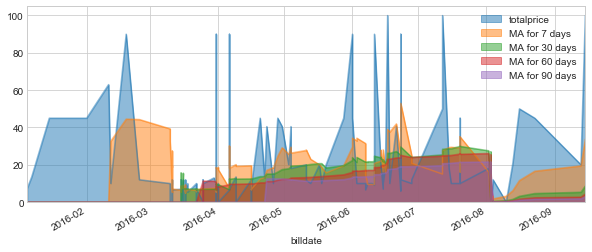

In [37]:
# rysowanie wykresu
gamesDF[['totalprice','MA for 7 days','MA for 30 days','MA for 60 days','MA for 90 days']].plot(kind='area', stacked=False, subplots=False,figsize=(10,4))

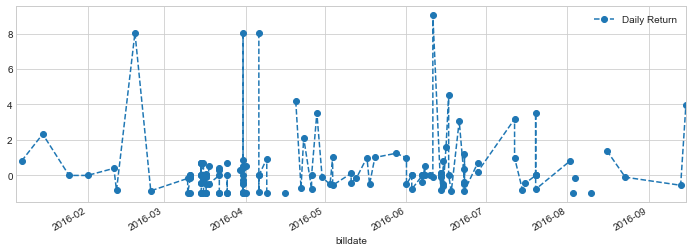

In [38]:
# pct_change - wyszukuje procentową zmianę dla każdego dnia
gamesDF['Daily Return'] = gamesDF['totalprice'].pct_change()
# Procentowy dzienny zwrot - wykres
gamesDF['Daily Return'].plot(figsize=(12,4),legend=True,linestyle='--',marker='o')

In [182]:
dataFrame1= pd.read_sql_query('''select paymenttype,state, totalprice, customerid from Orders
where state="DE"''', dbConnection)

In [183]:
# Sprawdzamy, które karty są najczęściej używane prez kilentów

SyntaxError: invalid syntax (<ipython-input-183-c21a58b970f6>, line 1)

In [ ]:
table1=pd.value_counts(dataFrame1["paymenttype"].values)
table1[:5]

In [ ]:
table1[:5].plot(marker="o", color ="r")

In [ ]:
dataFrame2= pd.read_sql_query('''select state, totalprice from Orders''', dbConnection)

In [ ]:
Wydatki= pd.read_sql_query('''SELECT o.state, c.gender, o.totalprice  from Orders o join Customers c on o.customerid = c.customerid 
                    ''', dbConnection)

In [ ]:
# Sprawdzamy łączną kwotę wydaną w poszczególnych stanch 

In [ ]:
Stany_wydatki=pd.value_counts(dataFrame2['state'].values)
Stany_wydatki[:10]

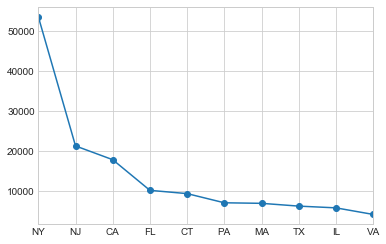

In [184]:
Stany_wydatki[:10].plot(marker ='o')

In [150]:
dataFrame3= pd.read_sql_query('''select state, gender, totalprice from Orders o join Customers c on o.customerid=c.customerid''', dbConnection)

In [ ]:
#Sprawdzamy kwotę wydatków dla każdej płc w stanach
#z zanotowaną najwyższą kwotą sprzedaży

In [151]:
Genderwydatki=np.where(dataFrame3['gender']=='M', 'Mezczyzni','Kobiety')
Genderwydatkitab=Wydatki.groupby(['state', Genderwydatki])
Genderwydatkitabcounts = Genderwydatkitab.size().unstack().fillna(0)

In [152]:
tab1=Genderwydatkitabcounts.sort_values("Kobiety", ascending=False)

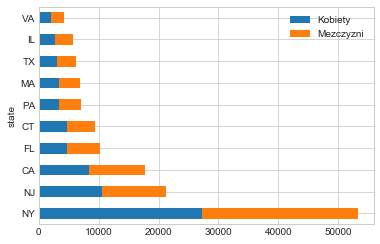

In [153]:
tab11=tab1[:10].plot(kind='barh', stacked=True)
